# EDA for Big Data Bowl

#### Bringing in needed packages and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
pd.set_option('display.max_columns', None)

### Starting with the games dataset

In [3]:
df_games = pd.read_csv('data\games.csv')

In [4]:
df_games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [5]:
df_games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


(array([ 3., 14., 14., 34., 25., 24., 10.,  6.,  4.,  2.]),
 array([ 3. ,  7.6, 12.2, 16.8, 21.4, 26. , 30.6, 35.2, 39.8, 44.4, 49. ]),
 <BarContainer object of 10 artists>)

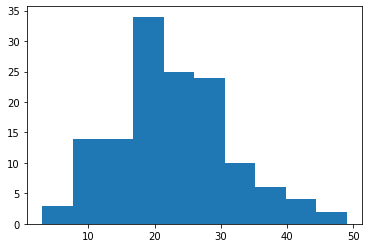

In [6]:
plt.hist(df_games.homeFinalScore)

(array([ 6., 10., 18., 23., 28., 23., 13., 10.,  2.,  3.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <BarContainer object of 10 artists>)

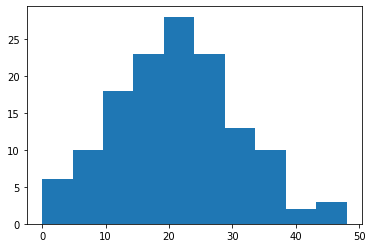

In [7]:
plt.hist(df_games.visitorFinalScore)

This dataset is pretty straightforward.

### Players dataset

In [8]:
df_players = pd.read_csv('data\players.csv')

In [9]:
df_players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [10]:
df_players.describe()

,nflId,weight
count,1683.000000,1683.000000
mean,48221.702317,245.724302
std,5217.040133,47.119299
min,25511.000000,153.000000
25%,44828.500000,205.000000
50%,47872.000000,236.000000
75%,53471.500000,290.000000
max,55241.000000,380.000000


(array([ 21., 271., 398., 227., 242.,  90., 233., 168.,  28.,   5.]),
 array([153. , 175.7, 198.4, 221.1, 243.8, 266.5, 289.2, 311.9, 334.6,
        357.3, 380. ]),
 <BarContainer object of 10 artists>)

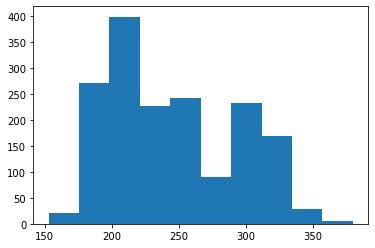

In [11]:
plt.hist(df_players.weight)

Another straightforward dataset, the addition of height and weight is interesting. We can look at momentum and use height as a proxy for wingspan. Need to convert height to numeric.

### Plays dataset

In [12]:
df_plays = pd.read_csv('data\plays.csv')

In [13]:
df_plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [14]:
df_plays.describe()

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,penaltyYards,prePenaltyPlayResult,playResult,absoluteYardlineNumber,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,615.000000,12486.000000,12486.000000,12486.000000,12481.000000,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,-2.091057,7.582012,7.218565,60.426077,6.424085,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,8.847321,8.751092,9.190933,23.917280,1.014728,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,-15.000000,-26.000000,-61.000000,11.000000,1.000000,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,-10.000000,2.000000,2.000000,40.000000,6.000000,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,-5.000000,5.000000,5.000000,61.000000,6.000000,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,5.000000,10.000000,10.000000,80.000000,7.000000,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,15.000000,98.000000,98.000000,109.000000,11.000000,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000


We have a lot of good data to work with here. Some preliminary thoughts
<br>
<ul>
  <li>We can look at run vs. pass</li>
  <li>We can look at stacked boxes</li>
  <li>There is lots of game information which is good.</li>
  <li>Can we trust the computed stats and how are they calculated?</li>
  <li>How do we integrate computed stats like pass probability?</li>
</ul>

### Tackles data

In [15]:
df_tackles = pd.read_csv('data/tackles.csv')

In [16]:
df_tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [17]:
df_tackles.describe()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000


This dataset is pretty straightforward. How do we account for assisted tackles though?

### Tracking data

In [18]:
df_tracking_1= pd.read_csv('data/tracking_week_1.csv')

In [19]:
df_tracking_1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [20]:
df_tracking_1.describe()

,gameId,playId,nflId,frameId,jerseyNumber,x,y,s,a,dis,o,dir
count,1.407439e+06,1.407439e+06,1.346246e+06,1.407439e+06,1.346246e+06,1.407439e+06,1.407439e+06,1.407439e+06,1.407439e+06,1.407439e+06,1.346397e+06,1.346397e+06
mean,2.022091e+09,2.030071e+03,4.724191e+04,2.512179e+01,4.847824e+01,6.172051e+01,2.679128e+01,2.800886e+00,1.844698e+00,2.847699e-01,1.802786e+02,1.802576e+02
std,7.536463e+01,1.208158e+03,5.065119e+03,1.730470e+01,3.088280e+01,2.424751e+01,9.553043e+00,2.103344e+00,1.417888e+00,2.156368e-01,1.021618e+02,1.054502e+02
min,2.022091e+09,5.500000e+01,2.551100e+04,1.000000e+00,1.000000e+00,-1.270000e+00,-4.620000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.022091e+09,9.830000e+02,4.340400e+04,1.100000e+01,2.100000e+01,4.294000e+01,2.130000e+01,1.170000e+00,8.300000e-01,1.200000e-01,9.000000e+01,9.007000e+01
50%,2.022091e+09,2.044000e+03,4.625600e+04,2.200000e+01,5.200000e+01,6.265000e+01,2.681000e+01,2.450000e+00,1.590000e+00,2.500000e-01,1.797100e+02,1.799400e+02
75%,2.022091e+09,3.022000e+03,5.251000e+04,3.700000e+01,7.500000e+01,8.072000e+01,3.225000e+01,4.130000e+00,2.560000e+00,4.200000e-01,2.702200e+02,2.710800e+02
max,2.022091e+09,5.096000e+03,5.517300e+04,1.140000e+02,9.900000e+01,1.201600e+02,5.825000e+01,2.914000e+01,5.658000e+01,5.920000e+00,3.600000e+02,3.600000e+02


We have a ton of really cool data here. We can tell where each player is in each frame and what direction they are facing.
We can look at things like:
<br>
<ul>
    <li>speed</li>
    <li>acceleration</li>
    <li>distance to ball/ballcarrier</li>
</ul>

In [24]:
pd.set_option('display.max_rows', None)

In [1]:
df_plays.head()

NameError: name 'df_plays' is not defined